## Connecting To SQL

In [3]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv' , 'order_items')
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Tanji123',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/SPPL IT/Desktop/Study/Guided Projects/Youtube/e-Commerce Analysis'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

# Project Start

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import mysql.connector

db= mysql.connector.connect(host="localhost",
                            username="root",
                            password="Tanji123",
                            database="ecommerce")

cur= db.cursor()

## Basic Queries

### 1. List all unique cities where customers are located.

In [3]:
query = """ SELECT DISTINCT customer_city FROM customers  """

cur.execute(query)

data=cur.fetchall()

data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

### 2. Count the number of orders placed in 2017.

In [9]:
query = """ SELECT 
    COUNT(*)
FROM
    orders
WHERE
    order_purchase_timestamp BETWEEN '2017-01-01' AND '2018-01-01';  """

cur.execute(query)

data=cur.fetchall()

print("Total Orders Placed in 2017 are :-",data[0][0])

Total Orders Placed in 2017 are :- 45101


### 3. Find the total sales per category.

In [14]:
query = """ SELECT UPPER(products.product_category) AS Category , 
round(sum(payments.payment_value),2) AS Sales
FROM products
JOIN order_items
ON products.product_id=order_items.product_id
JOIN payments
ON payments.order_id=order_items.order_id
GROUP BY product_category; """

cur.execute(query)

data=cur.fetchall()

data

[('PERFUMERY', 506738.66),
 ('FURNITURE DECORATION', 1430176.39),
 ('TELEPHONY', 486882.05),
 ('BED TABLE BATH', 1712553.67),
 ('AUTOMOTIVE', 852294.33),
 ('COMPUTER ACCESSORIES', 1585330.45),
 ('HOUSEWARES', 1094758.13),
 ('BABIES', 539845.66),
 ('TOYS', 619037.69),
 ('FURNITURE OFFICE', 646826.49),
 ('COOL STUFF', 779698.0),
 ('HEALTH BEAUTY', 1657373.12),
 ('PET SHOP', 311268.97),
 ('GENERAL INTEREST BOOKS', 64694.76),
 ('STATIONARY STORE', 317440.07),
 ('WATCHES PRESENT', 1429216.68),
 ('PCS', 279121.55),
 ('CLIMATIZATION', 91170.66),
 ('CONSTRUCTION TOOLS CONSTRUCTION', 241475.63),
 ('SPORT LEISURE', 1392127.56),
 ('BAGS ACCESSORIES', 187151.29),
 ('ELECTRONICS', 259857.1),
 ('CASA CONSTRUCAO', 136645.29),
 ('GAMES CONSOLES', 195480.38),
 ('FASHION BAGS AND ACCESSORIES', 218158.28),
 ('HOME APPLIANCES', 95532.27),
 ('GARDEN TOOLS', 838280.75),
 ('AGRO INDUSTRIA E COMERCIO', 118730.61),
 (None, 252801.71),
 ('AUDIO', 60324.62),
 ('TECHNICAL BOOKS', 24915.44),
 ('CONSTRUCTION TOOLS 

In [18]:
total_sales_per_category=pd.DataFrame(data, columns=["Category","Sales"])
total_sales_per_category

,Category,Sales
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,BED TABLE BATH,1712553.67
4,AUTOMOTIVE,852294.33
...,...,...
69,CDS MUSIC DVDS,1199.43
70,LA CUISINE,2913.53
71,FASHION CHILDREN'S CLOTHING,785.67
72,PC GAMER,2174.43


In [21]:
total_sales_per_category["Category"].nunique()

73

In [22]:
px.bar(total_sales_per_category , x="Category", y="Sales")

### 4. Calculate the percentage of orders that were paid in installments.

In [27]:
query = """SELECT SUM(CASE WHEN payment_installments >=1 THEN 1 
ELSE 0 END) /count(payment_installments)*100 AS Percentage FROM payments;"""

cur.execute(query)

data=cur.fetchall()

data[0][0]

Decimal('99.9981')

### 5. Count the number of customers from each state. 


In [29]:
query = """SELECT COUNT(customers.customer_id) AS Customer_ID_Count , customer_state FROM customers
GROUP BY customer_state;"""

cur.execute(query)

data=cur.fetchall()

data

[(41746, 'SP'),
 (3637, 'SC'),
 (11635, 'MG'),
 (5045, 'PR'),
 (12852, 'RJ'),
 (5466, 'RS'),
 (975, 'PA'),
 (2020, 'GO'),
 (2033, 'ES'),
 (3380, 'BA'),
 (747, 'MA'),
 (715, 'MS'),
 (1336, 'CE'),
 (2140, 'DF'),
 (485, 'RN'),
 (1652, 'PE'),
 (907, 'MT'),
 (148, 'AM'),
 (68, 'AP'),
 (413, 'AL'),
 (253, 'RO'),
 (536, 'PB'),
 (280, 'TO'),
 (495, 'PI'),
 (81, 'AC'),
 (350, 'SE'),
 (46, 'RR')]

In [33]:
Customer_Each_State= pd.DataFrame(data, columns=["Count", "State"])
Customer_Each_State

,Count,State
0,41746,SP
1,3637,SC
2,11635,MG
3,5045,PR
4,12852,RJ
5,5466,RS
6,975,PA
7,2020,GO
8,2033,ES
9,3380,BA


In [25]:
sns.set_style("whitegrid")

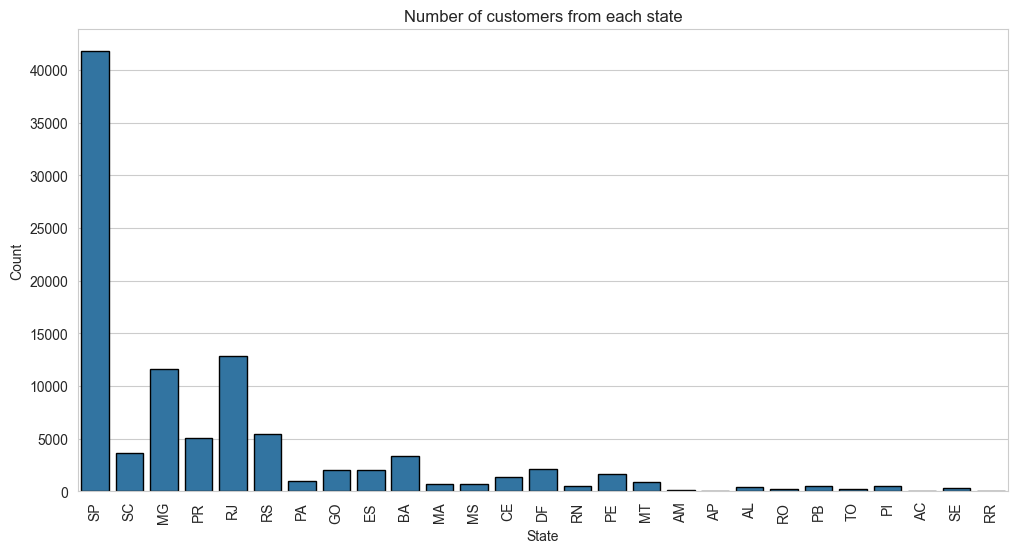

In [56]:
plt.figure(figsize = (12, 6))
sns.barplot(data=Customer_Each_State , x="State", y="Count",edgecolor="black")
plt.title("Number of customers from each state",fontdict={"size":"12"})
plt.xticks(rotation=90)
plt.show()

## Intermediate Queries

### 1. Calculate the number of orders per month in 2018.

In [6]:
query = """SELECT order_id,order_purchase_timestamp FROM ecommerce.orders;;"""

cur.execute(query)

data=cur.fetchall()

data

[('e481f51cbdc54678b7cc49136f2d6af7', '2017-10-02 10:56:33'),
 ('53cdb2fc8bc7dce0b6741e2150273451', '2018-07-24 20:41:37'),
 ('47770eb9100c2d0c44946d9cf07ec65d', '2018-08-08 08:38:49'),
 ('949d5b44dbf5de918fe9c16f97b45f8a', '2017-11-18 19:28:06'),
 ('ad21c59c0840e6cb83a9ceb5573f8159', '2018-02-13 21:18:39'),
 ('a4591c265e18cb1dcee52889e2d8acc3', '2017-07-09 21:57:05'),
 ('136cce7faa42fdb2cefd53fdc79a6098', '2017-04-11 12:22:08'),
 ('6514b8ad8028c9f2cc2374ded245783f', '2017-05-16 13:10:30'),
 ('76c6e866289321a7c93b82b54852dc33', '2017-01-23 18:29:09'),
 ('e69bfb5eb88e0ed6a785585b27e16dbf', '2017-07-29 11:55:02'),
 ('e6ce16cb79ec1d90b1da9085a6118aeb', '2017-05-16 19:41:10'),
 ('34513ce0c4fab462a55830c0989c7edb', '2017-07-13 19:58:11'),
 ('82566a660a982b15fb86e904c8d32918', '2018-06-07 10:06:19'),
 ('5ff96c15d0b717ac6ad1f3d77225a350', '2018-07-25 17:44:10'),
 ('432aaf21d85167c2c86ec9448c4e42cc', '2018-03-01 14:14:28'),
 ('dcb36b511fcac050b97cd5c05de84dc3', '2018-06-07 19:03:12'),
 ('403b9

In [8]:
df= pd.DataFrame(data, columns=["order_id","order_purchase_timestamp"])
df.head()

,order_id,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   order_id                  99441 non-null  object
 1   order_purchase_timestamp  99441 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [10]:
# Convert order_purchase_timestamp to datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

In [11]:
# Filter for the year 2018
df_2018 = df[df['order_purchase_timestamp'].dt.year == 2018]

In [14]:
orders_per_month = df_2018.groupby(df_2018['order_purchase_timestamp'].dt.month).count()

In [16]:
# Select the order_id column for the count
orders_per_month = orders_per_month['order_id']
orders_per_month.index.name = 'month'
orders_per_month.name = 'number_of_orders'

# Display the result
print(orders_per_month)

month
1     7269
2     6728
3     7211
4     6939
5     6873
6     6167
7     6292
8     6512
9       16
10       4
Name: number_of_orders, dtype: int64


In [17]:
query = """SELECT monthname(order_purchase_timestamp) as Months,count(order_id) AS Order_count
FROM orders WHERE year(order_purchase_timestamp) =2018
group by Months;"""

cur.execute(query)

data=cur.fetchall()

data

[('July', 6292),
 ('August', 6512),
 ('February', 6728),
 ('June', 6167),
 ('March', 7211),
 ('January', 7269),
 ('May', 6873),
 ('April', 6939),
 ('September', 16),
 ('October', 4)]

In [22]:
dff=pd.DataFrame(data, columns=["Months","Order_Count"])
dff

,Months,Order_Count
0,July,6292
1,August,6512
2,February,6728
3,June,6167
4,March,7211
5,January,7269
6,May,6873
7,April,6939
8,September,16
9,October,4


In [20]:
order =  ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October']

<Axes: xlabel='Order_Count', ylabel='Months'>

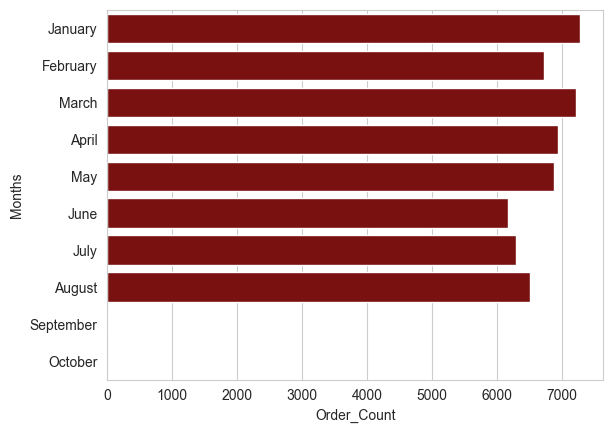

In [37]:
sns.barplot(dff, x="Order_Count" ,y= "Months", order= order , color="darkred")


In [45]:
fig = px.bar(dff, x="Months", y="Order_Count",
             category_orders={"Months": order},
             color_discrete_sequence=["darkcyan"])
fig.show()

### 2. Find the average number of products per order, grouped by customer city.

In [49]:
query = """with count_per_order as
(SELECT orders.order_id, orders.customer_id , count(order_items.order_id) as oc
FROM orders JOIN order_items 
ON orders.order_id = order_items.order_id
GROUP BY orders.order_id,orders.customer_id)

SELECT customers.customer_city, ROUND(AVG(count_per_order.oc),2) AS avg_order
FROM customers join count_per_order
ON customers.customer_id= count_per_order.customer_id
GROUP BY customers.customer_city ORDER BY avg_order ;"""

cur.execute(query)

data=cur.fetchall()

df=pd.DataFrame(data, columns=["Customer City","Avg Product Per Order"])
df.head(10)

,Customer City,Avg Product Per Order
0,sonora,1.00
1,porteiras,1.00
2,itabi,1.00
3,silvanopolis,1.00
4,salmourao,1.00
5,cha de alegria,1.00
6,cerro grande,1.00
7,francisco santos,1.00
8,barras,1.00
9,grupiara,1.00


### 3. Calculate the percentage of total revenue contributed by each product category.

In [54]:
query = """SELECT UPPER(products.product_category) AS Category ,
ROUND(((sum(payments.payment_value))/(SELECT SUM(payment_value) FROM payments))*100,2) AS SALES_PERCENTAGE
FROM products
JOIN order_items
ON products.product_id=order_items.product_id
JOIN payments
ON payments.order_id=order_items.order_id
GROUP BY product_category ORDER BY SALES_PERCENTAGE DESC;"""

cur.execute(query)

data=cur.fetchall()

df=pd.DataFrame(data, columns=["Category", "SALES_PERCENTAGE"])
df

,Category,SALES_PERCENTAGE
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93
...,...,...
69,HOUSE COMFORT 2,0.01
70,CDS MUSIC DVDS,0.01
71,PC GAMER,0.01
72,FASHION CHILDREN'S CLOTHING,0.00


### 4. Identify the correlation between product price and the number of times a product has been purchased.

In [56]:
query = """SELECT products.product_category,
COUNT(order_items.product_id),
ROUND(AVG(order_items.price),2)
FROM products JOIN order_items
ON products.product_id=order_items.product_id
GROUP BY product_category;"""

cur.execute(query)

data=cur.fetchall()

df=pd.DataFrame(data, columns=["Product Category", "Product Count","Avg Price"])
df

,Product Category,Product Count,Avg Price
0,HEALTH BEAUTY,9670,130.16
1,sport leisure,8641,114.34
2,Cool Stuff,3796,167.36
3,computer accessories,7827,116.51
4,Watches present,5991,201.14
...,...,...,...
69,flowers,33,33.64
70,Kitchen portable and food coach,15,264.57
71,House Comfort 2,30,25.34
72,CITTE AND UPHACK FURNITURE,38,114.95


<Axes: xlabel='Product Count', ylabel='Avg Price'>

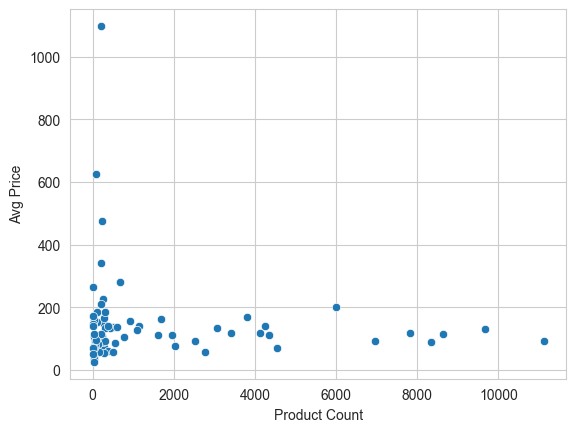

In [57]:
sns.scatterplot(df, x="Product Count", y= "Avg Price")